In [1]:
# standard modules
import matplotlib.pyplot as plt
import numpy as np
import os, sys


# myploat class
from plotclass import compute_p_values, extract_rosbag_data
from plotclass import BarChartWithStats 

# Hardware Experiment

## Payload Experiment

condition 1 = 6 May: circum + verti payload

condition 2 = 7 May: circum + horiz payload

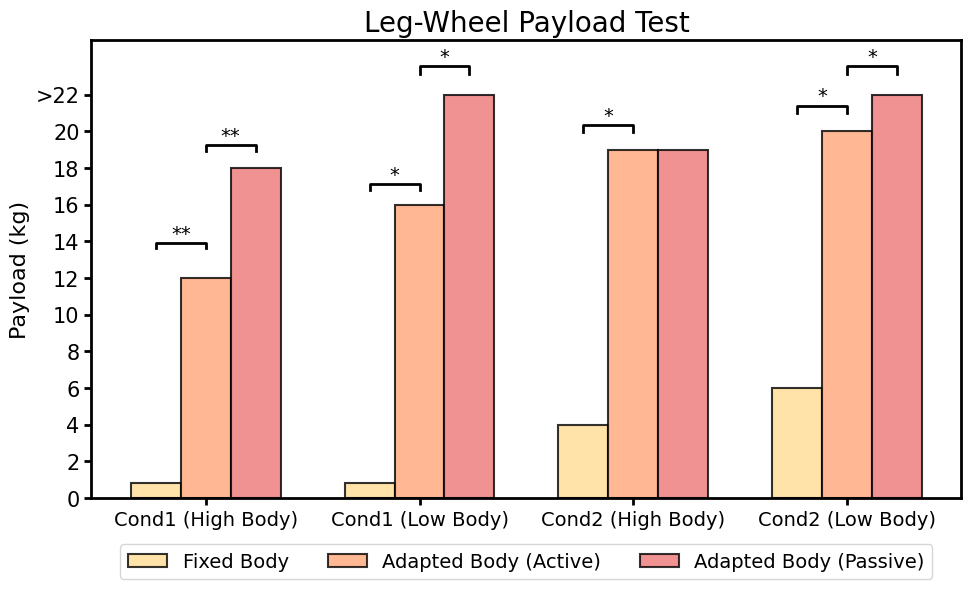

In [292]:
global_params = {
    'bar_group_spacing': 0.7,
    'color_list': None,
    'title_fontsize': 20,
    'label_fontsize': 16,
    'ticklabel_fontsize': 14,
    'legend_fontsize': 14,
    'annotation_fontsize': 14,
    'spine_width': 2,
    'tick_width': 2,
    'errorbar_linewidth': 2,
    'bar_edge_width': 1.5,
    'alpha': 0.8,
    'ylim': None
}

fig, ax = plt.subplots(figsize=(10, 6))

# Explicit group indices
minval = 0.8
data_example = [
    [  # Fixed
        (0, [minval,minval,minval,minval]),
        (1, [minval,minval,minval,minval]),
        (2, [4,4,4,4]),
        (3, [6,6,6,6])
    ],
    [  # Active Adapt
        (0, [11,11,11,11,13,13,13,13]),
        (1, [16,16,16,16]),
        (2, [19,19,19,19]),
        (3, [20,20,20,20])
    ],
    [  # Passive Adapt
        (0, [18,18,18,18]), 
        (1,[22,22,22,22]),
        (2, [19,19,19,19]),
        (3, [22,22,22,22])
    ]
]

group_labels = {0: 'Cond1 (High Body)', 1: 'Cond1 (Low Body)', 2: 'Cond2 (High Body)', 3: 'Cond2 (Low Body)'}
condition_labels = ['Fixed Body', 'Adapted Body (Active)', 'Adapted Body (Passive)']
comparisons = [(0,i,1,i) for i in range(4)]+[(1,i,2,i) for i in range(4)]
p_values = compute_p_values(data_example,comparisons)

params = global_params.copy()
params['title'] = 'Leg-Wheel Payload Test'
params['color_list'] = ['#FFDD94', '#FFA778','#EE7777']

chart = BarChartWithStats(ax, **params)
chart.plot(data_example, group_labels, condition_labels, comparisons=comparisons, p_values=p_values, 
           ebar = False, ylabel='Payload (kg)',legendloc='upper center',legendncol=3, 
           legendoffset =(0.5, -0.08), comparisonoffset = 0)

ax.set_ylim([0,25])
ax.set_yticks(np.arange(0,22.1,2))
yticklabs = np.arange(0,22.1,2).astype(int).astype(str)
yticklabs[-1] = '>22'
ax.set_yticklabels(yticklabs,fontsize=15)

plt.tight_layout()
plt.show()

## Error Experiment

average error (de/dt) computed for each trial that the robot move in the same direction as the load

[0.2433045973362562, 0.2857142857142857, 0.25, 0.37109336952269756, 1.0, 0.11428571428571428, 0.8333333333333333, 0.011136593448660475]


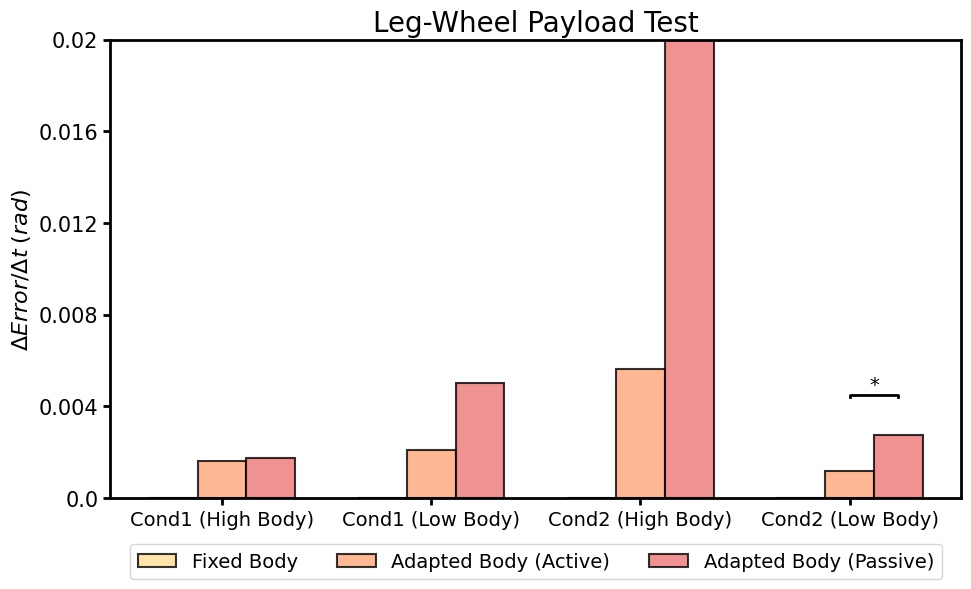

In [434]:

fig, ax = plt.subplots(figsize=(10, 6))

# Explicit group indices
minval = 0.8
data_example = [
    [  # Fixed
        (0, [0]),
        (1, [0]),
        (2, [0]),
        (3, [0])
    ],
    [  # Active Adapt
        (0, [0.002156197564392139,0.0,0.0007307399922136141,0.001520211291787871,0.0020822370457944947,0.0031717001837828196,0.0021318566625110474,0.0009670632894453842]),
        (1, [0.0029140044961943976,0.0016342379904777658,0.0005004539173622088,0.0024890462294183215,0.0028225203435168346,0.0021303258937720756]),
        (2, [0.0089828212998652,0.0025258940059252545,0.003734334718587208,0.005813113847355204,0.004495462557484491,0.013054706698287033,0.0008347412251656842]), # cond2 high
        (3, [0.0018848307207280151,0.0001740191654561569,0.0012702490455685765,0.0,0.0,0.0001963004718227427,0.004711502037458801])
    ],
    [  # Passive Adapt
        (0, [0.0040981646893986715,0.0,0.0011509751459916689]), 
        (1,[0.011384944667550299,0.0029207652209045118,0.004058561015720606,0.0017883166049399149]),
        (2, [0.0002940560090384142,0.05909844731726398,0.0058511368569954016]),
        (3, [0.0021353129036555565,0.0023065141974301117,0.004760903117564456,0.004545414082339448,0.0019058589476888658,0.0023921853356316716,0.0019402598998520383,0.001368497559850243,0.002594232543369281,0.0021381052411312885,0.001368503264620448,0.001445965442620528,0.006945146621353726,0.002548935740679351,0.002663432165311814])
    ]
]

group_labels = {0: 'Cond1 (High Body)', 1: 'Cond1 (Low Body)', 2: 'Cond2 (High Body)', 3: 'Cond2 (Low Body)'}
condition_labels = ['Fixed Body', 'Adapted Body (Active)', 'Adapted Body (Passive)']
comparisons = [(0,i,1,i) for i in range(4)]+[(1,i,2,i) for i in range(4)]
p_values = compute_p_values(data_example,comparisons)
print(p_values)

params = global_params.copy()
params['title'] = 'Leg-Wheel Payload Test'
params['color_list'] = ['#FFDD94', '#FFA778','#EE7777']

chart = BarChartWithStats(ax, **params)
chart.plot(data_example, group_labels, condition_labels, comparisons=comparisons, p_values=p_values, 
           ebar = 0, ylabel=r'$\Delta Error/ \Delta t \; (rad)$',legendloc='upper center',legendncol=3, 
           legendoffset =(0.5, -0.08), comparisonoffset = 0)

ax.set_ylim([0,0.02])
ax.set_yticks(np.arange(0,0.021,0.004))
yticklabs = np.round(np.arange(0,0.021,0.004),3).astype(str)
ax.set_yticklabels(yticklabs,fontsize=15)

plt.tight_layout()
plt.show()

### Read Data

In [426]:
path = 'rosbag-paper-6may/rosbag2_2025_05_06-21_56_43'

plt.figure(figsize=(20,5))
jointtime, jointangles = extract_rosbag_data(path,'/HERO/LegModule/JointAngles')


fdtime, data = extract_rosbag_data(path,'/HERO/WheelModule/Front/Command')
fspeed = data[:,::2]
fsteer = data[:,1::2]
f_fb = fspeed * np.cos(fsteer)
f_lr = fspeed * np.sin(fsteer)

bdtime, data = extract_rosbag_data(path,'/HERO/WheelModule/Back/Command')

bspeed = data[:,::2]
bsteer = data[:,1::2]
b_fb = bspeed * np.cos(bsteer)
b_lr = bspeed * np.sin(bsteer)


### Plot & Select

(28737,)
1746543603712506648 1746543803712433608


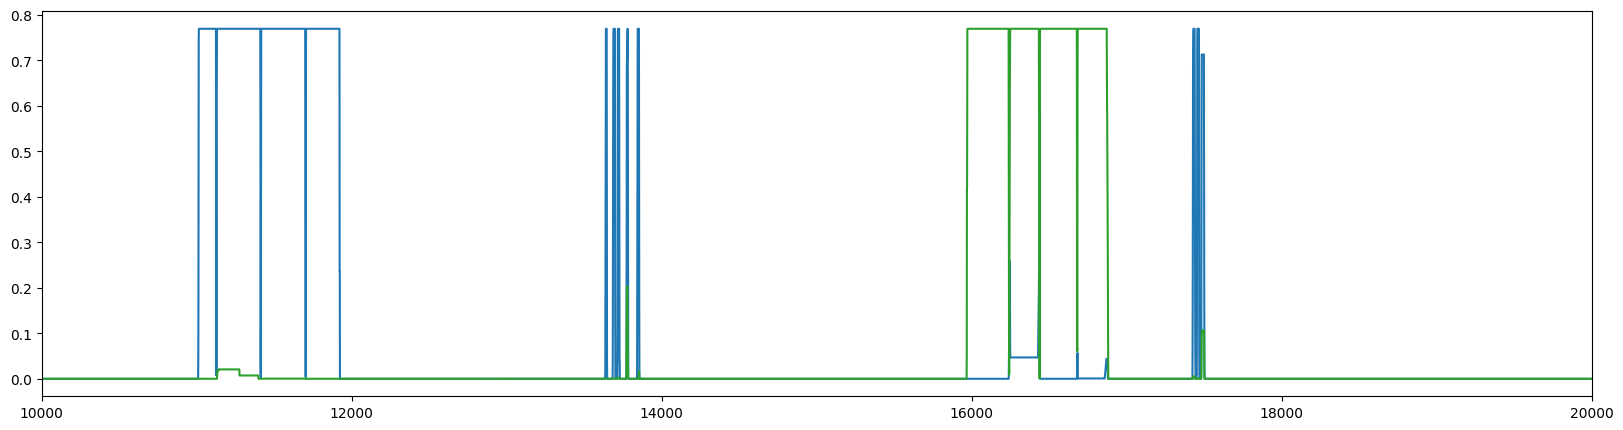

In [431]:
plt.figure(figsize=(20,5))
#plt.plot(v_fb)

cancle = f_fb[:,:]+b_fb[:,:]

fb = np.sum(np.clip(-f_fb[:]*b_fb,0,None),-1)
lr = np.sum(np.clip(-f_lr[:]*b_lr,0,None),-1)

plt.plot(fb,c='tab:blue')
plt.plot(lr,c='tab:green')
print(fb.shape)

#tstart = 28400
#tend = 29500

#tstart = 34450
#tend = 35800

tstart = 10000
tend = 20000

maindata = lr
maintime = fdtime

plt.xlim([tstart,tend])
fdtime_start = maintime[tstart]
fdtime_end = maintime[tend]

print(fdtime_start,fdtime_end)
plt.show()

### Extract Data

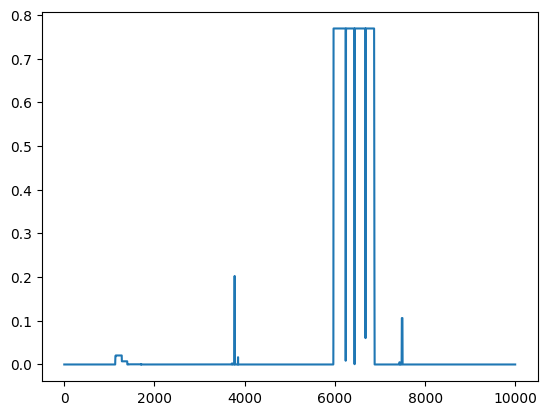

In [432]:
# extract jointpos
goodid = np.where(np.logical_and(jointtime > fdtime_start,jointtime < fdtime_end))
legpos = jointangles[goodid]
legtime = jointtime[goodid]

# extract command
goodid = np.where(np.logical_and(maintime > fdtime_start,maintime < fdtime_end))
goodcommand = maindata[goodid]
commandtime = maintime[goodid]

plt.plot(goodcommand,c='tab:blue')

plt.show()

### Compute Error

[11846 12396 12784 13260] [12386 12777 13254 13649]
0.0020822370457944947,0.0031717001837828196,0.0021318566625110474,0.0009670632894453842


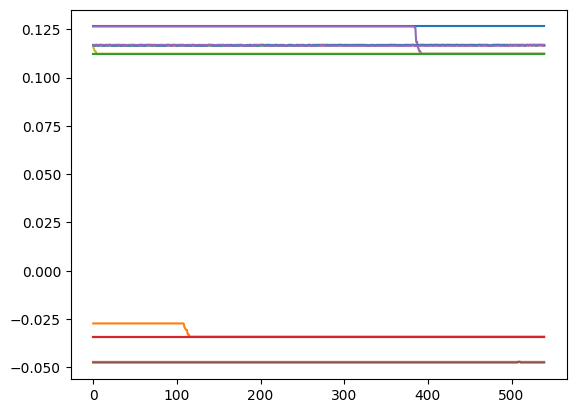

In [433]:

interp_goodcommand = np.interp(legtime,commandtime,goodcommand)


command_threshold = np.expand_dims(interp_goodcommand,-1)
command_threshold[command_threshold < 0.4] = 0.0
command_threshold[command_threshold >= 0.4] = 1.0
command_threshold = command_threshold.astype(float)

startids = np.where(np.diff(command_threshold,axis=0) > 0.5)[0]
endids = np.where(np.diff(command_threshold,axis=0) < -0.5)[0]

print(startids,endids)

segment_length = endids[0] - startids[0]  # assuming constant

# Build index matrix
offsets = np.arange(segment_length)  # [0, 1, 2, 3, 4]
indices = startids[:, None] + offsets  # shape (num_segments, segment_length)
# Extract segments

segments = legpos[indices]
tegments = legtime[indices]/1e9
dedt = np.diff(segments,axis=1)/np.expand_dims(np.diff(tegments,axis=1),-1)

derror = np.mean(np.abs(dedt),axis=(1,2))
print(','.join(derror.astype(str).tolist()))

for i in range(segments.shape[0]):
    plt.plot(segments[i,:,:])
plt.show()

